**Student_Performance_Predictor with Decision tree**


In [227]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [228]:
dataMat = pd.read_csv('student/student-mat.csv', sep=';')
dataPor = pd.read_csv('student/student-por.csv', sep=';')

In [229]:
dataMat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [230]:
dataPor.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [231]:
data = pd.concat([dataMat, dataPor])

In [232]:
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


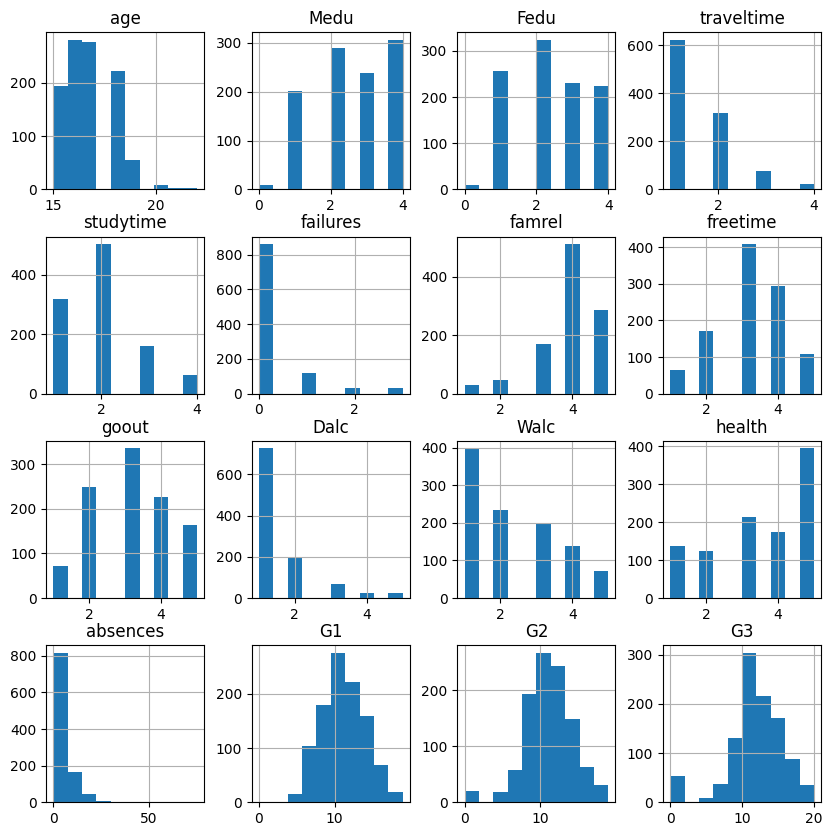

In [233]:
data.hist(figsize = (10,10))
plt.show()

In [234]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [235]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [236]:
cleanup_nums = {
    "yes": 1, "no": 0, 
    "F": 1, "M": 0, 
    "GP": 1, "MS": 0, 
    "R": 1, "U": 0, 
    "GT3": 1, "LE3": 0, 
    "A": 1, "T": 0
}

data.replace(cleanup_nums, inplace=True)

data = pd.get_dummies(data, columns=["Mjob", "Fjob", "reason", "guardian"])


C:\Users\Stacy1KelvinNotebook\AppData\Local\Temp\ipykernel_2360\4031357085.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(cleanup_nums, inplace=True)


**Regression**

In [237]:
X = data.drop(columns=['G3'])
y = data['G3'] 

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [ ]:
dt_regressor = DecisionTreeRegressor(max_depth=5,random_state=42)

dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [240]:
y_pred = dt_regressor.predict(X_test)


In [241]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared Score (R2)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")


Mean Absolute Error (MAE): 1.244019138755981
Mean Squared Error (MSE): 5.08133971291866
Root Mean Squared Error (RMSE): 2.2541827150696236
R-squared Score (R2): 0.6642952401442745


**Classification**

In [242]:
# Function to categorize G3 into classes
def categorize_grade(g):
    if g >= 10:
        return 1
    else:
        return 0

data['G3_class'] = data['G3'].apply(categorize_grade)

print(data[['G3', 'G3_class']])


     G3  G3_class
0     6         0
1     6         0
2    10         1
3    15         1
4    10         1
..   ..       ...
644  10         1
645  16         1
646   9         0
647  10         1
648  11         1

[1044 rows x 2 columns]


In [243]:
X = data.drop(columns=['G3', 'G3_class'])
y = data['G3_class']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [245]:
X_train.dtypes

school               int64
sex                  int64
age                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
Mjob_at_home          bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_at_home          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
F

In [246]:
clf = DecisionTreeClassifier(random_state=42,ccp_alpha=0.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [247]:
y_pred = clf.predict(X_test)

In [248]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8995215311004785

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       105
           1       0.90      0.98      0.94       313

    accuracy                           0.90       418
   macro avg       0.90      0.82      0.85       418
weighted avg       0.90      0.90      0.89       418



In [249]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [250]:
feature_names = X.columns
feature_names

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [251]:
clf.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [252]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = feature_names,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
G2,1.0
sex,0.0
age,0.0
address,0.0
school,0.0
Pstatus,0.0
Medu,0.0
Fedu,0.0
traveltime,0.0
studytime,0.0


In [253]:
features=list(feature_importances[feature_importances['importance'] > 0].index) 
features

['G2']

<Axes: >

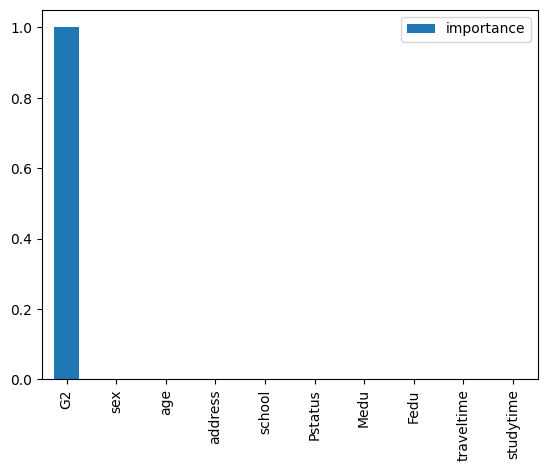

In [254]:
feature_importances.head(10).plot(kind='bar')

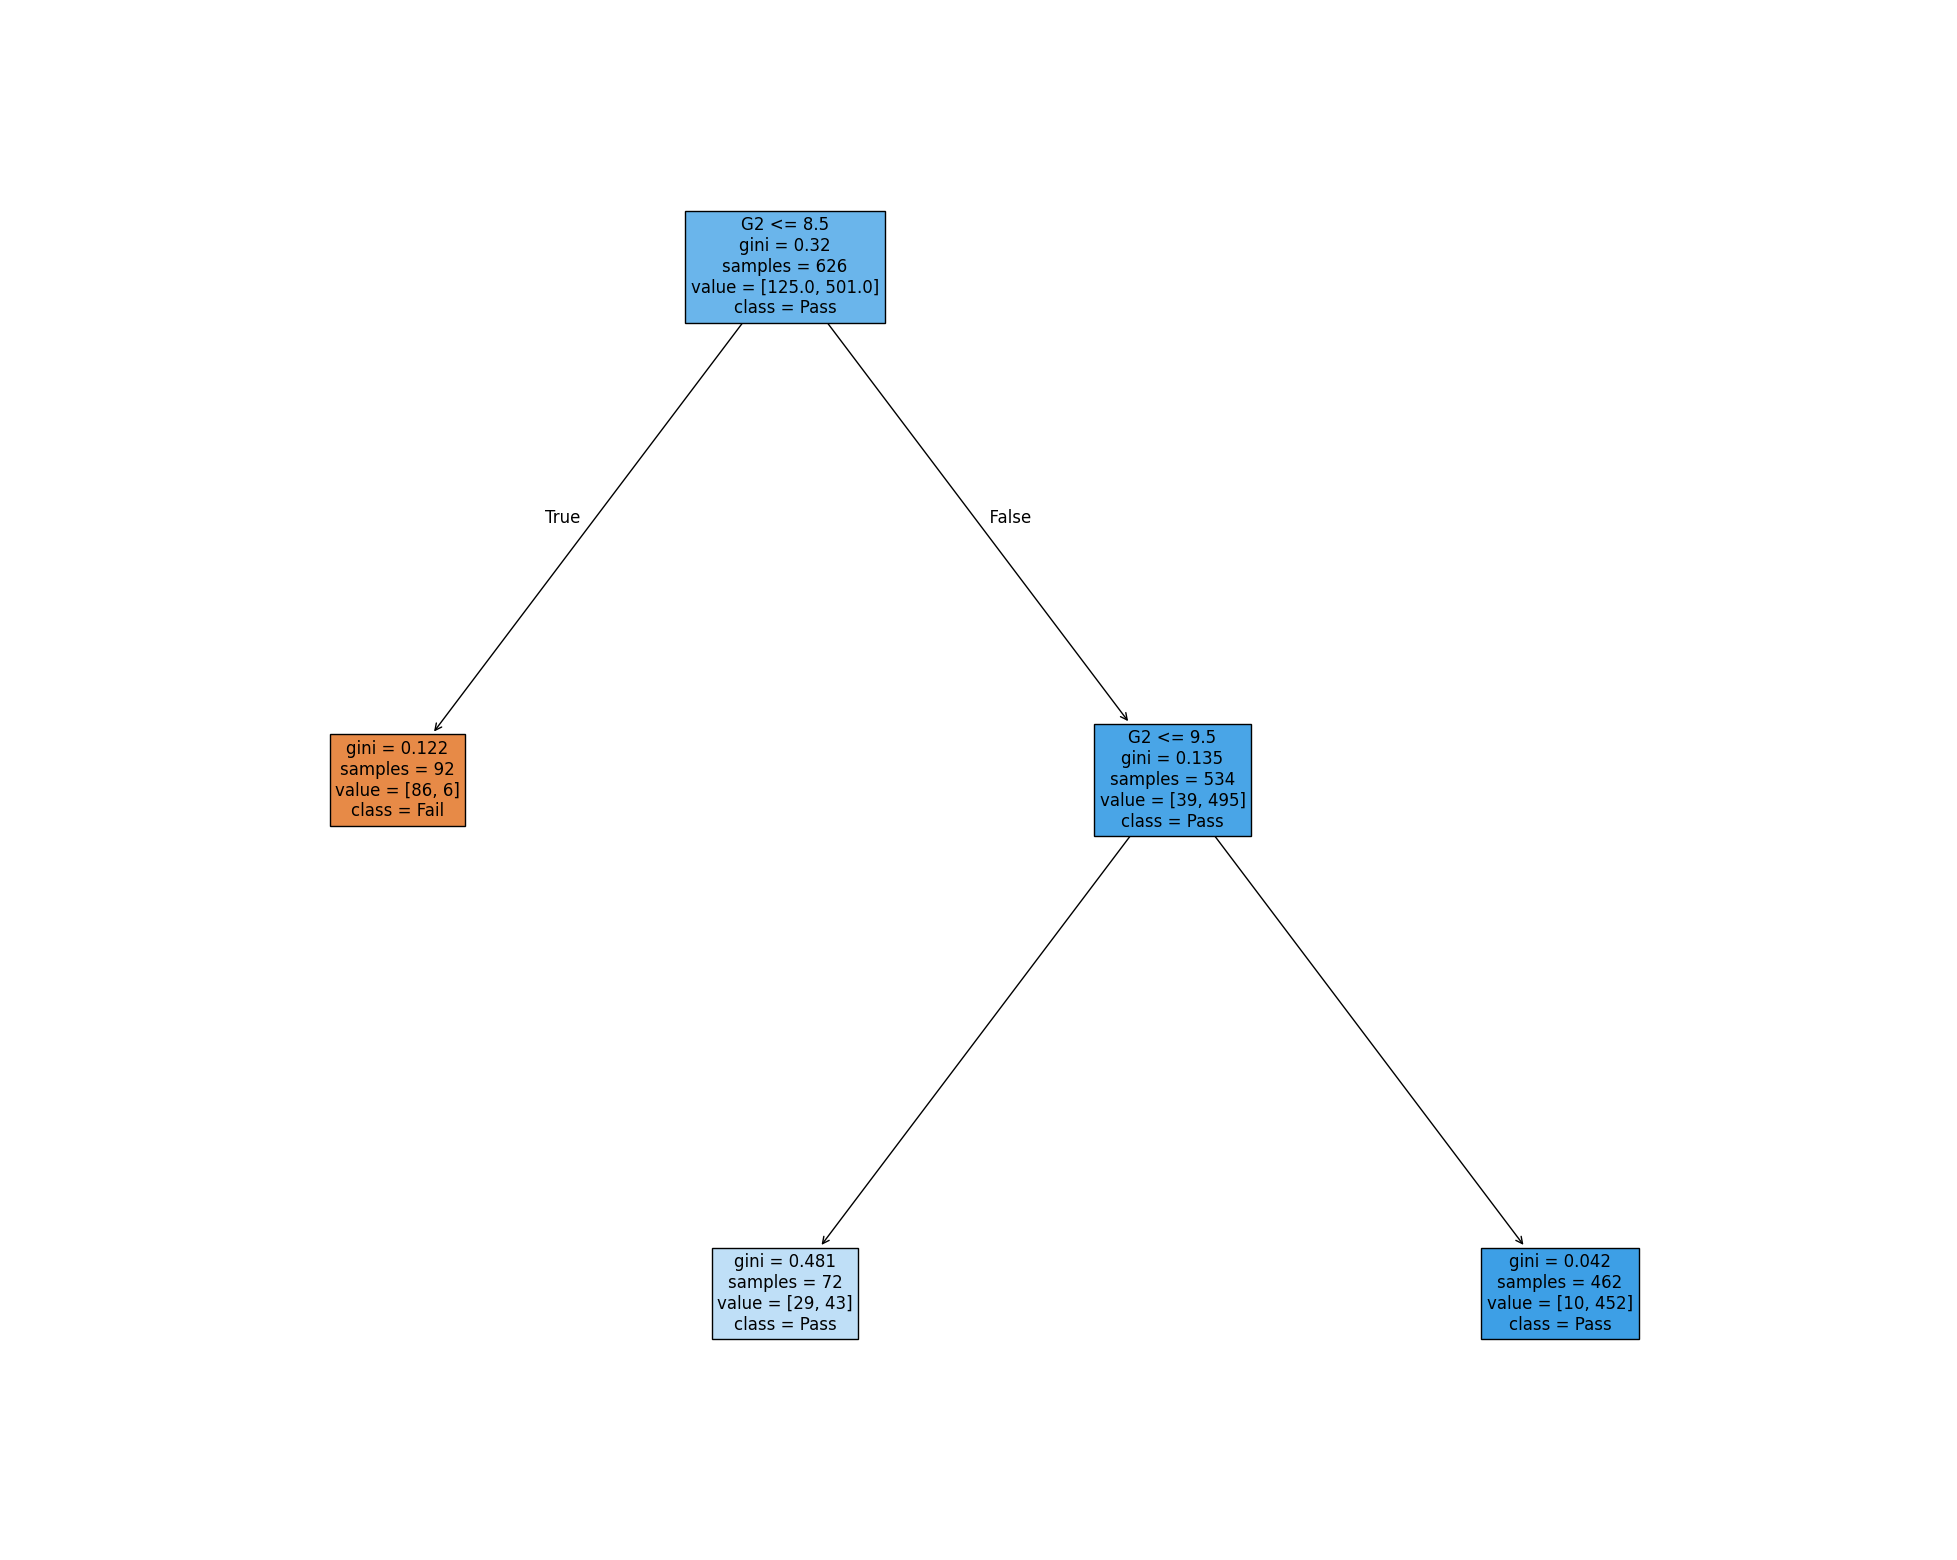

In [255]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=['Fail', 'Pass'],
                   filled=True,
                   fontsize=12)

In [256]:
param_grid = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
clf.fit(X_train, y_train)

print("Best Parameters:", clf.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [257]:
best_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)


best_clf.fit(X_train, y_train)
y_pred = best_clf.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred))


Optimized Accuracy: 0.8995215311004785
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       105
           1       0.90      0.97      0.94       313

    accuracy                           0.90       418
   macro avg       0.89      0.83      0.86       418
weighted avg       0.90      0.90      0.90       418



In [258]:
feature_names = X.columns
feature_names

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [259]:
best_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03635907, 0.96364093, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [260]:
feature_importances = pd.DataFrame(best_clf.feature_importances_,
                                   index = feature_names,
                                   columns=['importance']).sort_values('importance', ascending=False)